Churn Analysis : Logistic Regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sn
from sklearn.metrics import roc_curve

In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
df = pd.read_csv('data/churn_clean.csv')

In [17]:
pd.options.display.max_columns = None

In [18]:
df.info

<bound method DataFrame.info of       CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef9

In [19]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [20]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [21]:

df.columns


Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [22]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [23]:
df.isna().any()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService         False
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

In [24]:
df['PaymentMethod'].unique()
paymentMethod = df['PaymentMethod'].value_counts().to_frame()


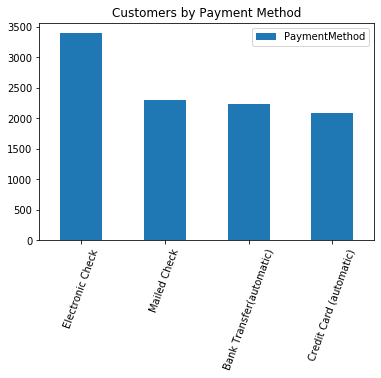

In [25]:
paymentMethod.plot.bar(rot=70, title="Customers by Payment Method")

In [26]:
df['Marital'].unique()

array(['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced'],
      dtype=object)

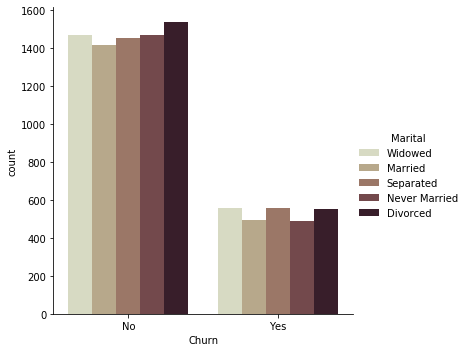

In [27]:

sn.catplot(x='Churn', hue='Marital', kind = 'count', palette='ch:.50',data=df)

In [309]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [28]:
df['Gender'].unique()

array(['Male', 'Female', 'Nonbinary'], dtype=object)

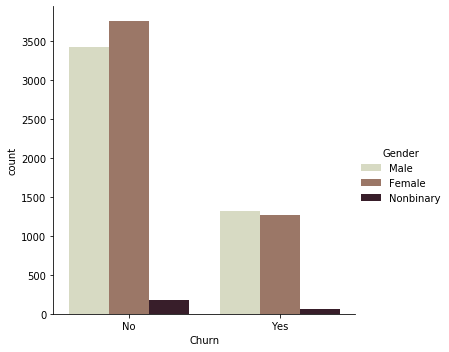

In [29]:

sn.catplot(x='Churn', hue='Gender', kind = 'count', palette='ch:.50',data=df)

In [30]:
df['InternetService'].unique()
InternetService = df['InternetService'].value_counts().to_frame()


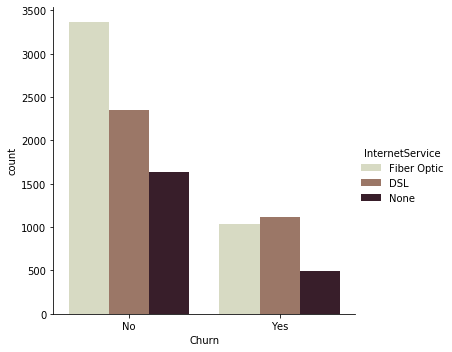

In [31]:

sn.catplot(x='Churn', hue='InternetService', kind = 'count', palette='ch:.50', data=df)

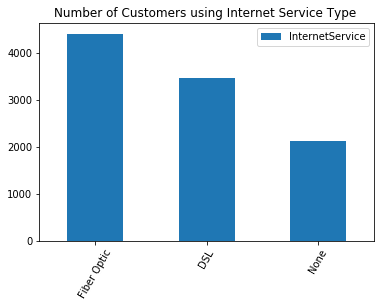

In [32]:
InternetService.plot.bar(rot=60, title='Number of Customers using Internet Service Type ')

In [33]:
contractRate = df['Contract'].value_counts().to_frame()
contractRate.columns

Index(['Contract'], dtype='object')

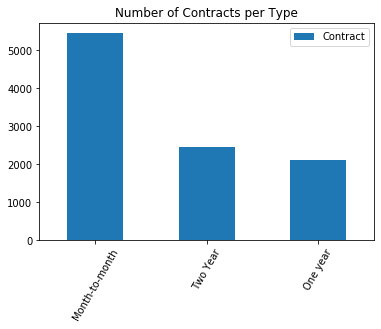

In [34]:
contractRate.plot.bar(rot=60, title="Number of Contracts per Type")

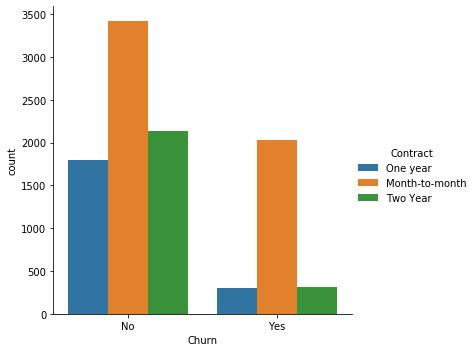

In [35]:

sn.catplot(x='Churn', hue='Contract', kind = 'count', data=df)

In [36]:
churnRate = df['Churn'].value_counts().to_frame()
churnRate
churnRate['Percentage'] = (churnRate['Churn']/churnRate['Churn'].sum())*100
churnRate

,Churn,Percentage
No,7350,73.5
Yes,2650,26.5


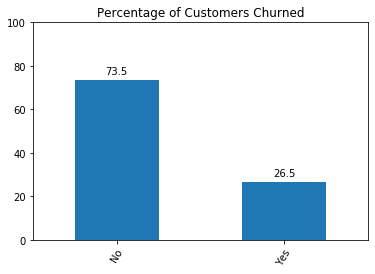

In [319]:
ax = churnRate['Percentage'].plot.bar(rot=60, title="Percentage of Customers Churned", ylim=(0,100))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() /2., p.get_height()), ha = 'center', va='center', xytext =(0,9), textcoords = 'offset points')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002489BA6E048>,
      dtype=object)

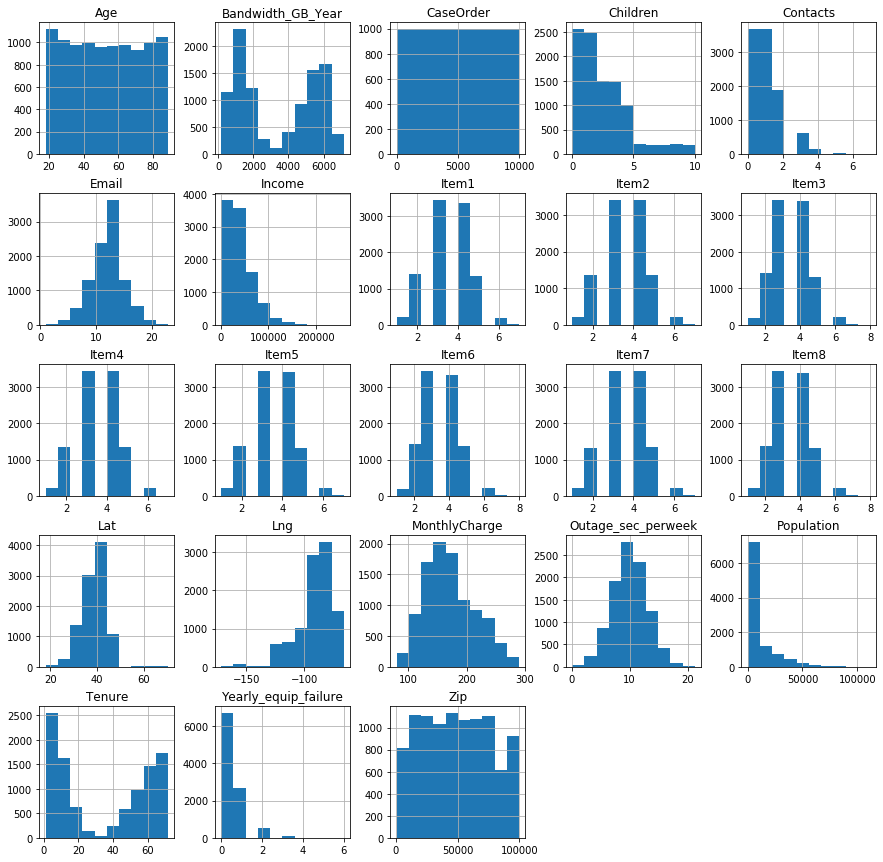

In [320]:
df.hist(figsize = (15,15))

HEATMAP DEVELOPMENT

turn Churn Contract and Payment Methods into numerical - OneHotEncoding?

In [37]:
df = pd.get_dummies(df, columns=['PaymentMethod','Churn'], prefix=['PayMethod','Churn'])

ONEHOTENCODING PaymentMethods Contract

In [38]:
df = pd.get_dummies(df, columns = ['Contract'],prefix="Contract")

In [39]:
df = pd.get_dummies(df, columns = ['Marital', 'InternetService','Port_modem','Phone','OnlineSecurity'],prefix=['Marital','Internet','modem','phone','security'])

In [40]:
df = pd.get_dummies(df, columns = ['OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],prefix=['Backup','Protection','TechSupport','StrTV','StrMovies'])

In [325]:
X_Features = df.columns

### Write new data to csv file

In [326]:
df.to_csv('prepared_churn_data.csv')

Correlation of Features:

In [41]:
df.corr()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,PayMethod_Bank Transfer(automatic),PayMethod_Credit Card (automatic),PayMethod_Electronic Check,PayMethod_Mailed Check,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two Year,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Internet_DSL,Internet_Fiber Optic,Internet_None,modem_No,modem_Yes,phone_No,phone_Yes,security_No,security_Yes,Backup_No,Backup_Yes,Protection_No,Protection_Yes,TechSupport_No,TechSupport_Yes,StrTV_No,StrTV_Yes,StrMovies_No,StrMovies_Yes
CaseOrder,1.000000,3.007020e-03,-0.014680,-0.001363,-0.007494,-0.006148,0.016038,0.000192,-0.001358,-0.011274,0.004361,0.005497,0.832550,0.003677,0.825561,-0.004318,0.005959,0.003245,-5.640975e-03,0.016429,-0.007837,0.003595,-0.014840,-0.012703,0.015888,-0.002057,-0.000454,0.409318,-0.409318,-0.000889,-0.011453,0.011893,-0.005785,0.009980,-0.006656,0.006265,-0.003590,0.007548,-0.005603,-0.001977,-0.007423,0.007423,0.002971,-0.002971,-0.000927,0.000927,-0.023961,0.023961,0.027355,-0.027355,-0.004340,0.004340,-0.005690,0.005690,0.005353,-0.005353
Zip,0.003007,1.000000e+00,-0.042580,-0.901786,0.045138,-0.017205,-0.008135,0.002947,-0.011520,-0.007860,-0.004720,0.011047,-0.003227,-0.008717,-0.002527,-0.026024,-0.003215,-0.019687,6.196497e-07,0.002923,0.007375,-0.005537,-0.002577,-0.021186,0.031831,-0.016876,0.009245,-0.008199,0.008199,0.005906,0.009169,-0.015540,-0.000445,0.016771,-0.001480,-0.004929,-0.009575,0.017515,-0.024300,0.009115,-0.013726,0.013726,-0.004571,0.004571,0.008295,-0.008295,0.014154,-0.014154,0.024445,-0.024445,-0.005842,0.005842,-0.010713,0.010713,0.005273,-0.005273
Lat,-0.014680,-4.257985e-02,1.000000,-0.100639,-0.220598,-0.000452,-0.002943,0.006563,0.004827,-0.030042,-0.002213,-0.007125,-0.015743,0.001406,-0.016949,0.005793,0.005380,-0.003421,1.101487e-02,-0.000464,-0.008726,0.006087,-0.019583,0.003377,0.007274,0.007312,-0.018618,-0.009387,0.009387,0.009940,-0.006817,-0.005055,0.003059,0.010073,0.001907,-0.006447,-0.008396,-0.020615,0.005918,0.016782,0.019988,-0.019988,0.005639,-0.005639,0.005409,-0.005409,0.013009,-0.013009,-0.017594,0.017594,0.009164,-0.009164,-0.017822,0.017822,0.000064,-0.000064
Lng,-0.001363,-9.017856e-01,-0.100639,1.000000,-0.048294,0.013634,0.012117,-0.002997,0.005646,0.007872,0.008118,-0.005577,0.003618,0.011765,0.003446,0.024389,0.003024,0.014966,-2.397805e-03,0.001366,-0.008770,0.001601,0.001912,0.020404,-0.025612,0.014319,-0.011598,0.004603,-0.004603,-0.008294,-0.001499,0.011034,0.001135,-0.021269,0.002580,-0.004451,0.021547,-0.011891,0.023270,-0.014402,0.003269,-0.003269,0.006163,-0.006163,-0.003072,0.003072,-0.015037,0.015037,-0.021181,0.021181,0.009469,-0.009469,0.008576,-0.008576,-0.010398,0.010398
Population,-0.007494,4.513808e-02,-0.220598,-0.048294,1.000000,-0.005877,0.010538,-0.008639,0.005483,0.017962,0.004019,-0.004483,-0.003559,-0.004778,-0.003902,0.000618,-0.002571,0.001620,-8.272481e-03,0.006970,0.000834,-0.013062,0.008524,-0.001749,0.011399,-0.013628,0.006077,0.008533,-0.008533,-0.007011,-0.010947,0.018508,-0.001275,-0.000426,0.017589,-0.010504,-0.005169,0.005247,-0.000289,-0.005748,-0.008577,0.008577,-0.008196,0.008196,-0.012549,0.012549,-0.010352,0.010352,0.003795,-0.003795,0.006606,-0.006606,0.006590,-0.006590,0.005882,-0.005882
Children,-0.006148,-1.720505e-02,-0.000452,0.013634,-0.005877,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-1.676831e-02,-0.000240,-0.000547,0.000687,-0.005236,-0.005761,0.005771,0.003441,-0.003750,0.004264,-0.004264,-0.024460,0.011277,0.017653,-0.002687,0.005260,-0.002647,0.000508,-0.000321,-0.003006,-0.003150,0.007314,-0.011283,0.011283,0.001629,-0.001629,-0.006937,0.006937,0.000297,-0.000297,-0.005477,0.005477,-0.000878,0.000878,0.007106,-0.007106,-0.00346

Text(0.5, 1, 'Correlation Heatmap')

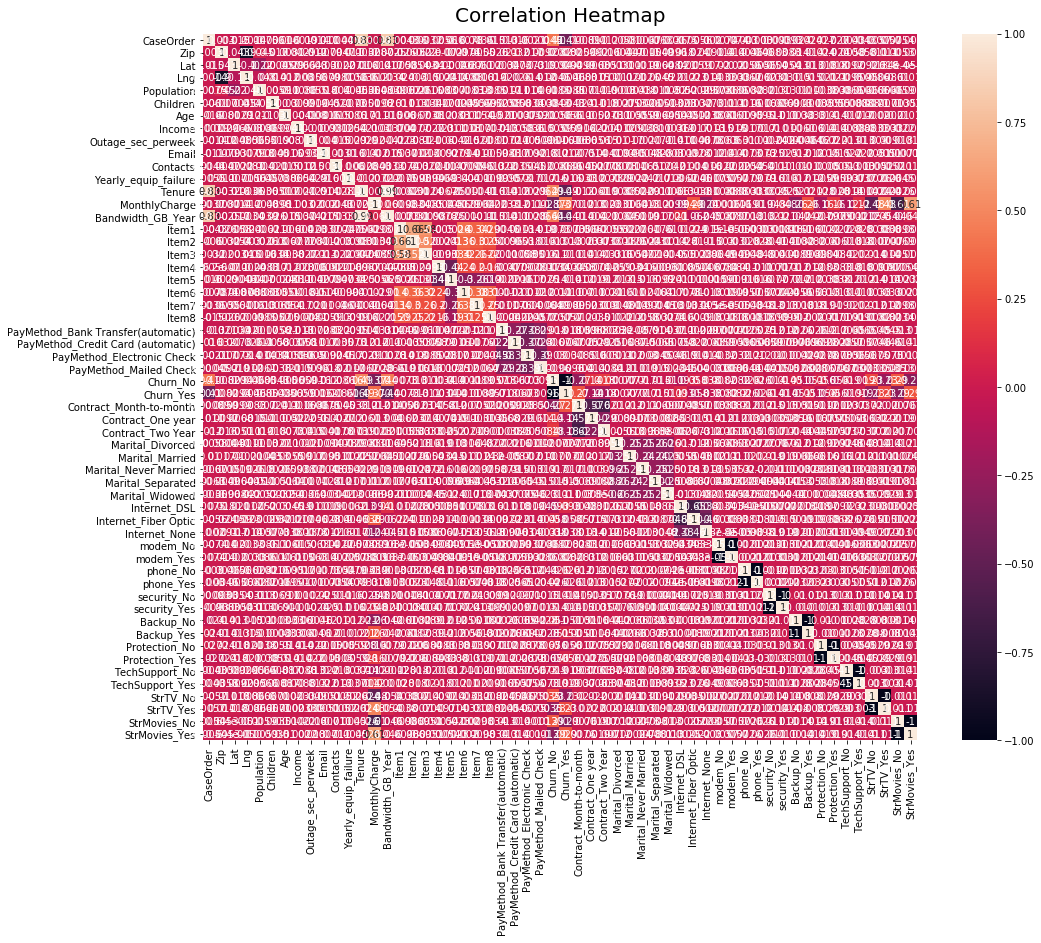

In [42]:
plt.figure(figsize= (16,13))
cor_map = sn.heatmap(df.corr(),vmin=-1, vmax=1, annot=True)
cor_map.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)

The heat map identifies a few areas where Churn_Yes and other features are correlated.  Those other features include Contract_Month_to-month, Tenure, StreamTV_Yes, StreamMovies_Yes, Monthly_Charge, BandwidthGBperYear.

### Prepare for Regression

In [43]:
features = df.columns

In [44]:
X_features = df.loc[:,df.columns != 'Churn_Yes']
y_features = df['Churn_Yes']
X_features

features = X_features.columns
item_remove = ['Churn_No','City','State','County','Area','Interaction','Customer_id','Area','TimeZone','Job','Gender','Techie','Tablet','Multiple','PaperlessBilling']

X_features = df.drop(item_remove, axis=1)
X_features = X_features.drop('UID',axis=1)
X_features = X_features.drop('Churn_Yes',axis=1)
# Found out that the Yes and No's are messing things up, remove all the No variables and try again.
X_features = X_features.drop('StrMovies_No',axis=1)
X_features = X_features.drop('StrTV_No',axis=1)
X_features = X_features.drop('TechSupport_No',axis=1)
X_features = X_features.drop('Protection_No',axis=1)
X_features = X_features.drop('Backup_No',axis=1)
X_features = X_features.drop('security_No',axis=1)
X_features = X_features.drop('modem_No',axis=1)
X_features = X_features.drop('phone_No',axis=1)
X_features = X_features.drop('Internet_None',axis=1)
X_features = X_features.drop('Marital_Widowed', axis = 1)
X_features = X_features.drop('Contract_Two Year',axis=1)
X_features = X_features.drop('PayMethod_Mailed Check',axis=1)
# End of remove of No values
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CaseOrder                           10000 non-null  int64  
 1   Zip                                 10000 non-null  int64  
 2   Lat                                 10000 non-null  float64
 3   Lng                                 10000 non-null  float64
 4   Population                          10000 non-null  int64  
 5   Children                            10000 non-null  int64  
 6   Age                                 10000 non-null  int64  
 7   Income                              10000 non-null  float64
 8   Outage_sec_perweek                  10000 non-null  float64
 9   Email                               10000 non-null  int64  
 10  Contacts                            10000 non-null  int64  
 11  Yearly_equip_failure                10000 

### Split Data Set

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [45]:
X_train, X_test, y_train, y_Test = train_test_split(X_features, y_features, test_size=0.80, random_state=234)

   ### Logistic Regression Calculation
   
   https://realpython.com/logistic-regression-python/

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
logmodel = LogisticRegression(solver='liblinear', random_state=0)

In [48]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
logmodel.coef_

array([[-6.71758683e-05,  2.61845731e-05, -2.92046994e-02,
         4.74203473e-02, -7.91872656e-06, -1.80246653e-02,
         1.53679391e-03, -5.39317778e-08, -2.93289153e-02,
        -1.06192559e-02, -5.01781447e-03, -4.85806801e-04,
        -1.18439257e-01,  3.04546283e-02,  6.33758125e-04,
        -1.40207128e-02, -3.15321531e-03, -9.01701650e-03,
        -4.04766381e-03, -1.37896638e-02, -1.52399683e-02,
        -1.35911917e-02, -9.59627299e-03, -2.46528798e-03,
        -1.98136596e-03,  4.42192303e-03,  3.72319157e-02,
        -1.93761228e-02, -3.24424262e-04, -1.45455467e-03,
        -8.81509943e-04,  1.96616820e-03,  1.69513110e-02,
        -2.27859067e-02,  1.16674172e-03, -2.97704178e-03,
        -3.54888572e-03, -4.01339124e-03, -5.09205809e-04,
        -5.46143573e-03,  4.15794760e-03,  1.39299887e-02]])

In [50]:
logmodel.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [51]:
logmodel.score(X_test,y_Test)

0.844

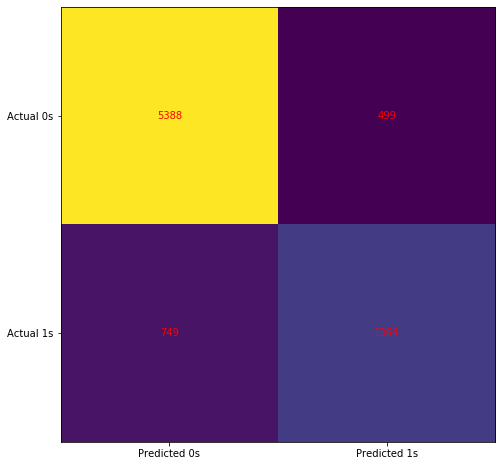

In [52]:
cm = confusion_matrix(y_Test, logmodel.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [53]:
print(classification_report(y_Test, logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5887
           1       0.73      0.65      0.69      2113

    accuracy                           0.84      8000
   macro avg       0.81      0.78      0.79      8000
weighted avg       0.84      0.84      0.84      8000



In [54]:
log_statsmodel = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [55]:
print(log_statsmodel.summary())

                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1958
Method:                           MLE   Df Model:                           41
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                     inf
Time:                        16:41:13   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
CaseOrder                             -0.0001   5.61e-05     -1.836      0.066      -0.000    6.95e-06
Zip                                  2.59e-05    7.5e-06   

O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [56]:
log_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1958
Method:                           MLE   Df Model:                           41
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                     inf
Time:                        16:43:23   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
CaseOrder                             -0.0001   5.61e-05     -1.836      0.066      -0.000    6.95e-06
Zip                                  2.59e-05    7.5e-06      3.454      0.001    1.12e-05    4.06e-05
Lat                                   -0.0237      0.017     -1.372      0.170      -0.058       0.010
Lng                                    0.0438      0.014      3.235      0.001       0.017       0.070
Population                         -7.015e-06   6.61e-06     -1.062      0.288      -2e-05    5.93e-06
Children                              -0.2865      0.088     -3.242      0.001      -0.460      -0.113
Age                                    0.0230      0.009      2.467      0.014       0.005       0.041
Income                              -3.93e-06   2.95e-06     -1.332      0.183   -9.71e-06    1.85e-06
Outage_sec_perweek                    -0.0621      0.029     -2.150      0.032      -0.119      -0.005
Email                                 -0.0372      0.028     -1.341      0.180      -0.092       0.017
Contacts                              -0.0484      0.090     -0.537      0.591      -0.225       0.128
Yearly_equip_failure                   0.0586      0.136      0.433      0.665      -0.207       0.324
Tenure                                -0.7638      0.213     -3.582      0.000      -1.182      -0.346
MonthlyCharge                          0.0261      0.008      3.439      0.001       0.011       0.041
Bandwidth_GB_Year                      0.0080      0.003      3.074      0.002       0.003       0.013
Item1                                 -0.0295      0.125     -0.235      0.814      -0.275       0.216
Item2                                  0.1842      0.118      1.565      0.118      -0.047       0.415
Item3                                 -0.0123      0.109     -0.113      0.910      -0.227       0.202
Item4                                 -0.0184      0.094     -0.196      0.845      -0.202       0.165
Item5                                 -0.4313      0.097     -4.434      0.000      -0.622      -0.241
Item6                                 -0.2401      0.103     -2.323      0.020      -0.443      -0.038
Item7                                 -0.1691      0.094     -1.801      0.072      -0.353       0.015
Item8                                 -0.1915      0.093     -2.059      0.039      -0.374      -0.009
PayMethod_Bank Transfer(automatic)    -0.1681      0.267     -0.630      0.528      -0.691       0.354
PayMethod_Credit Card (automatic)     -0.0531      0.259     -0.205      0.838      -0.561       0.455
PayMethod_Electronic Check             0.2515      0.233      1.080      0.280      -0.205       0.708
Contract_Month-to-month                3.3333      0.279     11.928      0.000       2.786       3.881
Contract_One year                     -0.0914      0.300     -0.305      0.761      -0.679       0.497
Marital_Divorced                      -0.3240   

Interpretation of the summary statistics focused mainly on the P values.  Looking for variables under 0.05 as candidates to trim the regression down to a  handful of variables.

Scanning the chart Children, Tenure, MonthlyCharge, Bandwidth_GB_Year, Item5,Contract_Month_to_Month, Protection_Yes, Backup_Yes, Phone_Yes all fall below the 0.05 threshold. 

### THE REDUCE FEATURE REGRESSION ANALYSIS

In [57]:
item_list = [ 'Children', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Contract_Month-to-month', 'Protection_Yes', 'security_Yes','Backup_Yes','phone_Yes']
X_features2 = X_features[item_list]

X_features2.columns


Index(['Children', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Contract_Month-to-month', 'Protection_Yes', 'security_Yes',
       'Backup_Yes', 'phone_Yes'],
      dtype='object')

In [58]:
X_train, X_test, y_train, y_Test = train_test_split(X_features2, y_features, test_size=0.80, random_state=234)

In [59]:
X_train

,Children,Tenure,MonthlyCharge,Bandwidth_GB_Year,Contract_Month-to-month,Protection_Yes,security_Yes,Backup_Yes,phone_Yes
8659,1,61.631160,252.624000,5652.464417,0,0,0,0,1
3649,2,10.866120,127.506700,1209.964607,1,1,0,1,0
218,5,21.293425,124.960655,2409.195918,0,0,0,0,1
6479,2,55.499750,192.488500,5021.065195,0,1,0,1,0
5783,0,66.632190,127.442100,6084.511649,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
5607,4,59.431020,184.964700,5361.231393,0,0,1,1,1
5635,6,65.293090,139.951200,6160.220905,0,0,0,0,1
4959,1,18.830560,127.488700,1961.987049,1,1,0,0,1
6841,1,68.531960,114.950900,6041.017611,1,0,0,1,0


In [60]:
log2model = LogisticRegression(solver='liblinear', random_state=0)

In [61]:
log2model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
log2model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [63]:
log2model.score(X_test,y_Test)

0.88975

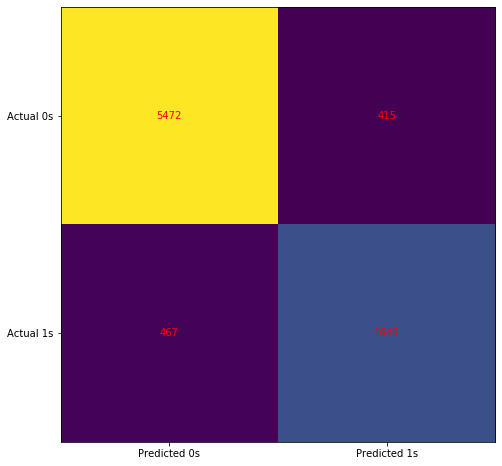

In [64]:
cm = confusion_matrix(y_Test, log2model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [65]:
print(classification_report(y_Test, log2model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5887
           1       0.80      0.78      0.79      2113

    accuracy                           0.89      8000
   macro avg       0.86      0.85      0.86      8000
weighted avg       0.89      0.89      0.89      8000



In [66]:
log_statsmodel2 = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [67]:
print(log_statsmodel2.summary())

                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1991
Method:                           MLE   Df Model:                            8
Date:                Mon, 25 Jan 2021   Pseudo R-squ.:                     inf
Time:                        16:46:29   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Children                   -0.2342      0.037     -6.396      0.000      -0.306      -0.162
Tenure                     -0.3486      0.028    -12.389      0.000      -0.404      -0.293


O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
O:\Users\Joe\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
